In [22]:
import os
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [58]:
dataset_path = "data/test_sl/train"

In [24]:
# file_names = glob.glob(f"{dataset_path}/episode_*.npy")
# assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

# data = []
# for file in tqdm(file_names):
#     data.append(np.load(file, allow_pickle=True))

In [25]:
# obj_poses = []
# for episode in data:
#     obj_poses.append(episode[-1]["obj_pose"])
# obj_poses = np.stack(obj_poses)

# plt.scatter(obj_poses[:, 0], obj_poses[:, 1], color="green")

In [59]:
stats = np.load(os.path.join(dataset_path, "obj_poses.npy"), allow_pickle=True).tolist()
poses = stats["obj_poses"]
successes = stats["successes"]

Text(0, 0.5, 'x')

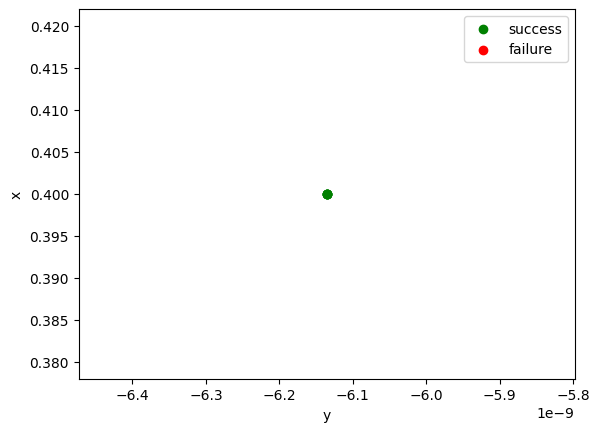

In [60]:
poss = [pos for pos in poses[:,:3]]
poss = np.stack(poss)

plt.scatter(poss[successes, 1], poss[successes, 0], color="green", label="success")
plt.scatter(poss[~successes, 1], poss[~successes, 0], color="red", label="failure")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

Text(0.5, 0, 'yaw')

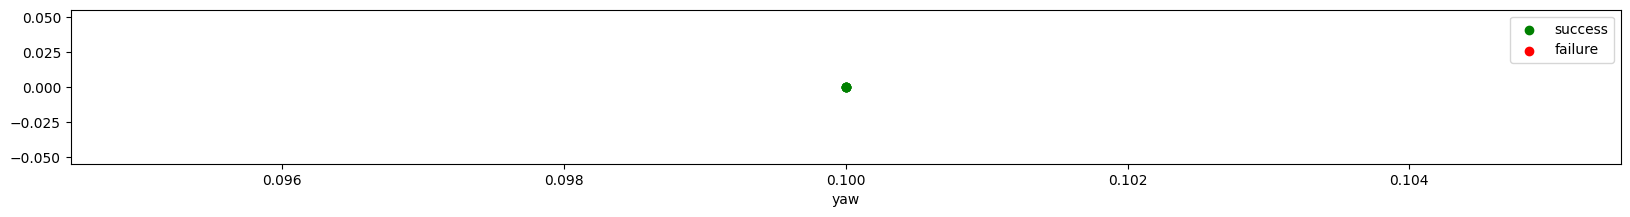

In [61]:
oris = [ori for ori in poses[:,3:]]
oris = np.stack(oris)

plt.figure(figsize=(20,2))
plt.scatter(oris[successes, 2], np.zeros_like(oris[successes, 0]), color="green", label="success")
plt.scatter(oris[~successes, 2], np.zeros_like(oris[~successes, 0]), color="red", label="failure")
plt.legend()
plt.xlabel("yaw")

In [62]:
# some of the outer angle randomizations fail

In [30]:
    # # modify data
    
    # dataset_path = "data/green_block/train"
    # key = "215122255213_rgb"
    
    # file_names = glob.glob(f"{dataset_path}/episode_*.npy")
    # assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"
    
    # for file in tqdm(file_names):
    #     data = np.load(file, allow_pickle=True)
    #     for i in range(len(data)):
    #         data[i][key] = data[i][key][:,160:]
    #         print(data[i][key].shape)
    #     np.save(file, data)